<a href="https://colab.research.google.com/github/Clalloures/Machine-Learning/blob/master/Simple_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

##  Bibliotecas
Neste exemplo vamos utilizar:
numpy 
sklearn
matplotlib
Tem um post no insta explicando cada uma delas


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Gerando o Dataset
Precisando de dados para gerar a classificação, para isso, vamos criar usando o Scikit (funçao make_blobs) para gerar um dataset linearmente separável

Na parte inicial vamos colocar algumas informações necessárias para a criação do dataset. Quantidade de dados, entre outras informações.




*   **random_state** : garante que várias inicializações não interfiram nos núemros aleatórios, podemos colocar qualquer dado aqui
*   **centers** : centros dos blobs
*   **cluster_std** : desvio padrão do cluster para criarmos a dispersão dos centros até a região limite de cada grupo
*   **ftest** : fração da divisão de teste, ou seja, porcentagem de dados usada pára fins de teste
*   **n_features** : número de classes que desejamos
*   **n_samples** : número total de amostras desejadas



Agora, geramos os dados e separamos eles em grupo de treino e grupo de teste

Esta etapa é útil para não perdermos os valores presentes inicialmente dentro dos grupos de teste e treino

Agora vamos visualizar os dados gerados e ver como estão distribuidos no espaço

In [ ]:
random_state = 30
centers = [(0,0), (8,8)]
cluster_std = 1
ftest = 0.30
n_features = 2
n_samples = 2000

In [ ]:
inputs, targets = make_blobs(n_samples = n_samples, centers = centers, n_features = n_features, cluster_std = cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=ftest, random_state=blobs_random_seed)

In [ ]:
np.save('./datasave.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./datasave.npy', allow_pickle=True)


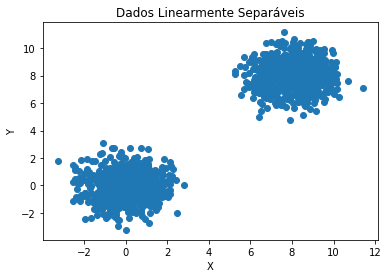

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Dados Linearmente Separáveis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Criação do SVM

Para isso devemos escolher uma função do kernel. 

**Okay, mas o que é uma função do kernel?**
Qualquer função matemática pode ser usada como uma função do kernel. Dentro do scikit-learn é possível escrever a função do kernel que deseja ou utilizar alguma das funções já presentes dentro da biblioteca. Sendo elas, por exemplo:

1.   Linear: mapeia o mesmo em um espaço diferente
2.   Polinomial
3.   RBF ou Radial Basis Function




In [ ]:
from sklearn import svm

Como pode ver, é bem simples criar o classificador. apenas chamamos svm e escolhemos seu kernel

In [ ]:
clf = svm.SVC(kernel='linear')

Agora geramos um ajuste em nossos dados de treinamento ao nosso classificador

In [ ]:
clf = clf.fit(X_train, y_train)

## Usando nosso SVM

In [ ]:
predictions = clf.predict(X_test)

Após utilizar a função de predict, vamos conferir como nossos dados se sairam através da matriz de confusão. Ela nos ajuda a ver se nossos dados foram classificados de forma correta ou não.

Por ela podemos ver : Verdadeiro Positivo, Verdadeiro Negativo, Falso Positivo, Falso Negativo

In [ ]:
from sklearn.metrics import plot_confusion_matrix

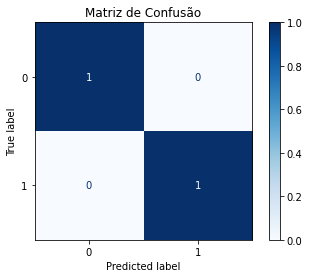

In [ ]:
predictions = clf.predict(X_test)

matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Matriz de Confusão')
plt.show(matrix)
plt.show()

## Localizando os vetores de suporte do modelo

O limite de decisões é determinado pelos vetores de suporte. Estes vetores correspondem aos valores de cada grupo que se encontram mais próximos da linha de divisão. 

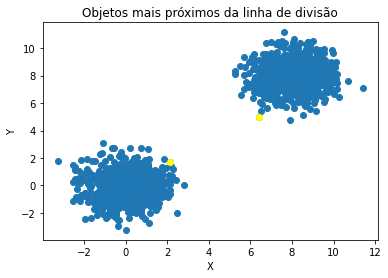

In [ ]:
support_vectors = clf.support_vectors_
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='yellow')
plt.title('Objetos mais próximos da linha de divisão')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Visualizando cada grupo do teste

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


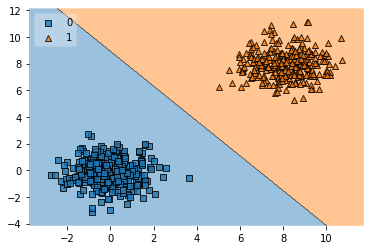

In [ ]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.show()

In [ ]:
X = [10, 50, 40, 92, 15, 50]
Y = [2,7,1.6,8,0.6,11]

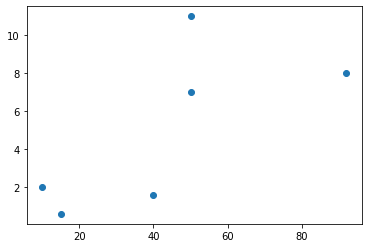

In [ ]:
plt.scatter(X,Y)
plt.show()

In [ ]:
grupo1 = np.array([[10,2], [50,7], [40, 1.6], [92,8], [15,0.6], [50,11]])
grupo2 = [1,0,1,1,0,1]

In [ ]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [ ]:
clf.fit(grupo1, grupo2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.predict([15,7])


ValueError: ignored